In [75]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [76]:
sonar_measures = pd.read_csv('/content/drive/MyDrive/TAED2/The-Technical-Debt-Dataset-CSV/SONAR_MEASURES.csv')
sonar_measures.head()

,project_id,analysis_key,complexity,file_complexity,complexity_in_classes,class_complexity,complexity_in_functions,function_complexity,class_complexity_distribution,function_complexity_distribution,file_complexity_distribution,xs,xs_percent,tangle_design,fat_class,fat_design,fat_leaf_package,fat_method,cognitive_complexity,tests,test_execution_time,test_errors,skipped_tests,test_failures,test_success_density,test_data,coverage,new_coverage,lines_to_cover,new_lines_to_cover,uncovered_lines,new_uncovered_lines,line_coverage,new_line_coverage,coverage_line_hits_data,conditions_to_cover,new_conditions_to_cover,uncovered_conditions,new_uncovered_conditions,branch_coverage,...,sg_i.CORE_CCD,sg_i.CORE_VIOLATING_COMPONENTS,sg_i.JAVA_PACKAGES,sg_i.JAVA_CYCLIC_PACKAGES,sg_i.CORE_COMPONENTS,sg_i.CORE_MAX_ACD,sg_i.CORE_RACD,sg_i.CORE_COMPONENT_CYCLE_GROUPS,sg_i.CORE_PARSER_DEPENDENCIES_TO_REMOVE_COMPONENTS,sg_i.JAVA_BYTE_CODE_INSTRUCTIONS,sg_i.CORE_STATEMENTS,sg_i.JAVA_BIGGEST_PACKAGE_CYCLE_GROUP,sg_i.CORE_IGNORED_THRESHOLD_VIOLATIONS,sg_i.CORE_SOURCE_ELEMENT_COUNT,sg_i.CORE_IGNORED_CYCLIC_COMPONENTS,sg_i.JAVA_PACKAGE_CYCLE_GROUPS,sg_i.PERCENTAGEOFDEADCODE,sg_i.CORE_CYCLICITY_COMPONENTS,sg_i.CORE_DUPLICATED_LINES,sg_i.JAVA_PARSER_DEPENDENCIES_TO_REMOVE_PACKAGES,sg_i.STRUCTURAL_DEBT_COST,sg_i.CURRENT_VIRTUAL_MODEL,sg_i.VIRTUAL_MODEL_FEATURE_AVAILABLE,sg_i.NUMBER_OF_TASKS,sg_i.NUMBER_OF_UNAPPLICABLE_TASKS,sg_i.NUMBER_OF_RESOLUTIONS,sg_i.NUMBER_OF_UNAPPLICABLE_RESOLUTIONS,sg_i.NUMBER_OF_REFACTORINGS,sg_i.NUMBER_OF_UNAPPLICABLE_REFACTORINGS,sg_i.NUMBER_OF_PARSER_DEPENDENCIES_AFFECTED_BY_REFACTORINGS,sg_i.JAVA_CYCLIC_PACKAGES_PERCENT,sg_i.MAX_MODULE_NCCD,sg_i.ARCHITECTURE_FEATURE_AVAILABLE,sg_i.NUMBER_OF_ISSUES,sg_i.NUMBER_OF_CRITICAL_ISSUES_WITHOUT_RESOLUTION,sg_i.VIOLATING_COMPONENTS_PERCENT,sg_i.UNASSIGNED_COMPONENTS_PERCENT,sg_i.NUMBER_OF_THRESHOLD_VIOLATIONS,sg_i.NUMBER_OF_WORKSPACE_WARNINGS,sg_i.NUMBER_OF_IGNORED_CRITICAL_ISSUES
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,30703.0,11.5,30387.0,10.9,29441.0,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147","0=1306,5=535,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98298.0,24725.0,98298.0,24725.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,30703.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147","0=1306,5=535,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,98298.0,NaN,98298.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,30703.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147","0=1306,5=535,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,98306.0,NaN,98306.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,30699.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11566,2=2821,4=891,6=307,8=164,10=97,12=147","0=1307,5=534,10=396,20=175,30=170,60=46,90=34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,98290.0,NaN,98290.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,30670.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11556,2=2819,4=891,6=306,8=164,10=97,12=147","0=1307,5=534,10=394,20=175,30=170,60=46,90=34",NaN,

In [77]:
sonar_issues = pd.read_csv('/content/drive/MyDrive/TAED2/The-Technical-Debt-Dataset-CSV/SONAR_ISSUES.csv')
sonar_issues.head()

,PROJECT_ID,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,RULE,SEVERITY,STATUS,RESOLUTION,EFFORT,DEBT,TAGS,CREATION_DATE,CLOSE_DATE,MESSAGE,COMPONENT,START_LINE,END_LINE,START_OFFSET,END_OFFSET,HASH,FROM_HOTSPOT,NOT_FOUND,CLOSE_ANALYSIS_KEY
0,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcPC4KKKThcBEZ8,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,39.0,39.0,27.0,37.0,NaN,NaN,0,NaN
1,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcRC4KKKThcBEZ9,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,45.0,45.0,27.0,38.0,NaN,NaN,0,NaN
2,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ-,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,51.0,51.0,24.0,37.0,NaN,NaN,0,NaN
3,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ_,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,obsolete,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,59.0,59.0,24.0,38.0,NaN,NaN,0,NaN
4,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,squid:S1135,INFO,CLOSED,FIXED,NaN,NaN,cwe,2007-01-21 11:11:02,2007-08-21 13:26:38,Complete the task associated to this TODO comm...,Apache_Cayenne:framework/cayenne-jdk1.4-unpubl...,33.0,33.0,0.0,71.0,NaN,NaN,0,AWeF1Ou7C4KKKThcBEZc


In [78]:
sonar_measures = sonar_measures.iloc[:,[0,1,2,3,84,85,86,87,98,99,100,101,102,103,111,119,128,129,130,131,145,147,149,152,154,156,158,160,161,163,164,165,166,168,170,171]]
sonar_measures

,project_id,analysis_key,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,ncloc_language_distribution,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.401406,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.396168,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,30703.0,11.5,19516,1567,409,5.6,16004,103,560,7431,7315,595,16004,204,6207330,3.6,2.401742,14275,1606,14092,5,123,1995,4,347522.0,206911.0,"css=236,java=172724,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,30699.0,11.5,19516,1567,409,5.6,16000,103,560,7429,7313,595,16000,204,6206280,3.6,2.399874,14271,1606,14092,5,123,1995,4,347471.0,206876.0,"css=236,java=172689,web=16138,xml=17813",2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,30670.0,11.5,19462,1564,408,5.6,15991,103,560,7426,7309,593,15991,204,6200220,3.6,2.387834,14262,1606,14092,5,123,1995,4,347152.0,206674.0,"css=236,java=172487,web=16138,xml=17813",2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66706,org.apache:zookeeper,AWMblPr7O48jNFNDCAof,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,"java=57607,web=884,xml=2869",733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66707,org.apache:zookeeper,AWMbdJy4pxPbkMlK2_uE,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,"java=57607,web=884,xml=2869",733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66708,org.apache:zookeeper,AWMbdFnspxPbkMlK29Ot,9029.0,21.5,5507,316,100,6.0,4628,17,497,1979,2066,69,4628,23,1839000,3.1,0.000000,4207,32,174,5,389,9350,4,92092.0,61300.0,"java=57547,web=884,xml=2869",732.0,423.0,28.0,4230.0,29026.0,9302.0,13.2
66709,org.apache:zookeeper,AWMbdBpopxPbkMlK26Vg,9029.0,21.5,5507,316,100,6.0,4628,17,497,1979,2066,69,4628,23,1839000,3.1,0.000000,4207,32,174,5,389,9350,4,92092.0,61300.0,"java=57547,web=884,xml=2869",732.0,423.0,28.0,4230.0,29026.0,9302.0,13.2


In [79]:
sonar_issues = sonar_issues.iloc[:,[1,2,3,5,7,9,11,12,13,17,18]]
sonar_issues

,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,SEVERITY,RESOLUTION,DEBT,CREATION_DATE,CLOSE_DATE,MESSAGE,START_OFFSET,END_OFFSET
0,AWd5_psxC4KKKThc-qK6,AWeF1RcPC4KKKThcBEZ8,CODE_SMELL,INFO,NaN,10.0,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,27.0,37.0
1,AWd5_psxC4KKKThc-qK6,AWeF1RcRC4KKKThcBEZ9,CODE_SMELL,INFO,NaN,10.0,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,27.0,38.0
2,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ-,CODE_SMELL,INFO,NaN,10.0,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,24.0,37.0
3,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ_,CODE_SMELL,INFO,NaN,10.0,2007-01-21 11:11:02,NaN,Do not forget to remove this deprecated code s...,24.0,38.0
4,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-08-21 13:26:38,Complete the task associated to this TODO comm...,0.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...
1024609,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBu,CODE_SMELL,MINOR,NaN,2.0,2016-12-21 22:32:01,NaN,Rename this local variable to match the regula...,18.0,22.0
1024610,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBv,BUG,BLOCKER,NaN,30.0,2016-12-21 22:32:01,NaN,Remove this return statement from this finally...,16.0,22.0
1024611,AWMdqqQTO48jNFNDElBo,AWMdqrV_O48jNFNDElBw,CODE_SMELL,MAJOR,NaN,5.0,2016-12-21 22:32:01,NaN,"Add the ""@Override"" annotation above this meth...",24.0,27.0
1024612,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBt,CODE_SMELL,MAJOR,NaN,5.0,2016-12-21 22:32:01,NaN,"Rename ""PORT"" which hides the field declared a...",18.0,22.0


In [80]:
# the 77.96% of the sonar issues are closed, then we can get the needed fixing time per closed sonar issue.
sum(sonar_issues['RESOLUTION'] == "FIXED")/sonar_issues['RESOLUTION'].size

0.7795569843863153

In [81]:
sonar_issues_fixed = sonar_issues[sonar_issues['RESOLUTION'] == "FIXED"]
sonar_issues_fixed

,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,SEVERITY,RESOLUTION,DEBT,CREATION_DATE,CLOSE_DATE,MESSAGE,START_OFFSET,END_OFFSET
4,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-08-21 13:26:38,Complete the task associated to this TODO comm...,0.0,71.0
6,AWd5_psxC4KKKThc-qK6,AWd5_tYbC4KKKThc-t8y,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-09-19 14:32:09,Complete the task associated to this TODO comm...,0.0,86.0
7,AWd5_psxC4KKKThc-qK6,AWd5_tY_C4KKKThc-t88,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-09-02 20:19:48,Complete the task associated to this TODO comm...,0.0,35.0
18,AWd5_psxC4KKKThc-qK6,AWd5_rj5C4KKKThc-rxb,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2008-03-30 12:03:31,Complete the task associated to this TODO comm...,0.0,90.0
20,AWd5_psxC4KKKThc-qK6,AWd5_rkGC4KKKThc-rxv,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-11-21 07:52:09,Complete the task associated to this TODO comm...,0.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...
1024475,AWMdGfe8O48jNFNDDtun,AWMdGgFQO48jNFNDDtzK,CODE_SMELL,MINOR,FIXED,1.0,2016-03-22 23:30:42,2016-04-06 18:06:30,"At most one statement is allowed per line, but...",0.0,109.0
1024476,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzM,CODE_SMELL,MINOR,FIXED,1.0,2016-03-22 23:30:42,2016-04-06 18:06:30,"At most one statement is allowed per line, but...",0.0,39.0
1024477,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzO,CODE_SMELL,MINOR,FIXED,1.0,2016-03-22 23:30:42,2016-04-06 18:06:30,"At most one statement is allowed per line, but...",0.0,70.0
1024478,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzP,CODE_SMELL,MINOR,FIXED,90.0,2016-03-22 23:30:42,2016-04-06 18:06:30,Complex class,0.0,3.0


In [82]:
import numpy as np
from datetime import datetime

a = [datetime.strptime(date,'%Y-%m-%d %H:%M:%S') for date in sonar_issues_fixed['CLOSE_DATE']]
b = [datetime.strptime(date,'%Y-%m-%d %H:%M:%S') for date in sonar_issues_fixed['CREATION_DATE']]

sonar_issues_fixed['FIXING_TIME'] = np.array(a)-np.array(b)
sonar_issues_fixed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,SEVERITY,RESOLUTION,DEBT,CREATION_DATE,CLOSE_DATE,MESSAGE,START_OFFSET,END_OFFSET,FIXING_TIME
4,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-08-21 13:26:38,Complete the task associated to this TODO comm...,0.0,71.0,212 days 02:15:36
6,AWd5_psxC4KKKThc-qK6,AWd5_tYbC4KKKThc-t8y,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-09-19 14:32:09,Complete the task associated to this TODO comm...,0.0,86.0,241 days 03:21:07
7,AWd5_psxC4KKKThc-qK6,AWd5_tY_C4KKKThc-t88,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-09-02 20:19:48,Complete the task associated to this TODO comm...,0.0,35.0,224 days 09:08:46
18,AWd5_psxC4KKKThc-qK6,AWd5_rj5C4KKKThc-rxb,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2008-03-30 12:03:31,Complete the task associated to this TODO comm...,0.0,90.0,434 days 00:52:29
20,AWd5_psxC4KKKThc-qK6,AWd5_rkGC4KKKThc-rxv,CODE_SMELL,INFO,FIXED,NaN,2007-01-21 11:11:02,2007-11-21 07:52:09,Complete the task associated to this TODO comm...,0.0,69.0,303 days 20:41:07
...,...,...,...,...,...,...,...,...,...,...,...,...
1024475,AWMdGfe8O48jNFNDDtun,AWMdGgFQO48jNFNDDtzK,CODE_SMELL,MINOR,FIXED,1.0,2016-03-22 23:30:42,2016-04-06 18:06:30,"At most one statement is allowed per line, but...",0.0,109.0,14 days 18:35:48
1024476,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzM,CODE_SMELL,MINOR,FIXED,1.0,2016-03-22 23:30:42,2016-04-06 18:06:30,"At most one statement is allowed per line, but...",0.0,39.0,14 days 18:35:48
1024477,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzO,CODE_SMELL,MINOR,FIXED,1.0,2016-03-22 23:30:42,2016-04-06 18:06:30,"At most one statement is allowed per line, but...",0.0,70.0,14 days 18:35:48
1024478,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzP,CODE_SMELL,MINOR,FIXED,90.0,2016-03-22 23:30:42,2016-04-06 18:06:30,Complex class,0.0,3.0,14 days 18:35:48


In [83]:
sonar_issues_fixed = sonar_issues_fixed.iloc[:,[0,1,2,3,4,5,8,9,10,11]]
sonar_issues_fixed

,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,SEVERITY,RESOLUTION,DEBT,MESSAGE,START_OFFSET,END_OFFSET,FIXING_TIME
4,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,INFO,FIXED,NaN,Complete the task associated to this TODO comm...,0.0,71.0,212 days 02:15:36
6,AWd5_psxC4KKKThc-qK6,AWd5_tYbC4KKKThc-t8y,CODE_SMELL,INFO,FIXED,NaN,Complete the task associated to this TODO comm...,0.0,86.0,241 days 03:21:07
7,AWd5_psxC4KKKThc-qK6,AWd5_tY_C4KKKThc-t88,CODE_SMELL,INFO,FIXED,NaN,Complete the task associated to this TODO comm...,0.0,35.0,224 days 09:08:46
18,AWd5_psxC4KKKThc-qK6,AWd5_rj5C4KKKThc-rxb,CODE_SMELL,INFO,FIXED,NaN,Complete the task associated to this TODO comm...,0.0,90.0,434 days 00:52:29
20,AWd5_psxC4KKKThc-qK6,AWd5_rkGC4KKKThc-rxv,CODE_SMELL,INFO,FIXED,NaN,Complete the task associated to this TODO comm...,0.0,69.0,303 days 20:41:07
...,...,...,...,...,...,...,...,...,...,...
1024475,AWMdGfe8O48jNFNDDtun,AWMdGgFQO48jNFNDDtzK,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,109.0,14 days 18:35:48
1024476,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzM,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,39.0,14 days 18:35:48
1024477,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzO,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,70.0,14 days 18:35:48
1024478,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzP,CODE_SMELL,MINOR,FIXED,90.0,Complex class,0.0,3.0,14 days 18:35:48


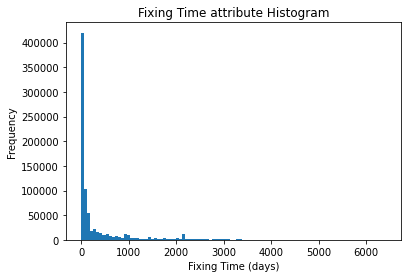

In [84]:
import matplotlib.pyplot as plt
plt.hist(sonar_issues_fixed['FIXING_TIME'].astype('timedelta64[s]')/86400, bins = 100)
plt.title('Fixing Time attribute Histogram')
plt.xlabel('Fixing Time (days)')
plt.ylabel('Frequency')
plt.show()

In [85]:
sum(sonar_issues_fixed['DEBT'].isna())/sonar_issues_fixed['DEBT'].size

0.03547440046573062

In [86]:
sonar_issues_fixed = sonar_issues_fixed[sonar_issues_fixed['DEBT'].notna()]
sonar_issues_fixed

,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,SEVERITY,RESOLUTION,DEBT,MESSAGE,START_OFFSET,END_OFFSET,FIXING_TIME
41,AWd5_psxC4KKKThc-qK6,AWd5_r4pC4KKKThc-sCZ,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,16.0,32.0,189 days 10:17:20
198,AWd5_psxC4KKKThc-qK6,AWeGaFhPC4KKKThcBLOk,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,17.0,42.0,299 days 11:39:29
199,AWd5_psxC4KKKThc-qK6,AWeGaFnBC4KKKThcBLOm,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,16.0,34.0,299 days 11:39:29
200,AWd5_psxC4KKKThc-qK6,AWeGaFnBC4KKKThcBLOn,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,22.0,40.0,299 days 11:39:29
201,AWd5_psxC4KKKThc-qK6,AWeGaFnCC4KKKThcBLOo,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,16.0,34.0,299 days 11:39:29
...,...,...,...,...,...,...,...,...,...,...
1024475,AWMdGfe8O48jNFNDDtun,AWMdGgFQO48jNFNDDtzK,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,109.0,14 days 18:35:48
1024476,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzM,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,39.0,14 days 18:35:48
1024477,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzO,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,70.0,14 days 18:35:48
1024478,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzP,CODE_SMELL,MINOR,FIXED,90.0,Complex class,0.0,3.0,14 days 18:35:48


In [87]:
sum(sonar_issues_fixed['END_OFFSET'].isna())/sonar_issues_fixed['DEBT'].size

0.054504744227099854

In [88]:
sonar_issues_fixed = sonar_issues_fixed[sonar_issues_fixed['END_OFFSET'].notna()]
sonar_issues_fixed

,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,SEVERITY,RESOLUTION,DEBT,MESSAGE,START_OFFSET,END_OFFSET,FIXING_TIME
41,AWd5_psxC4KKKThc-qK6,AWd5_r4pC4KKKThc-sCZ,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,16.0,32.0,189 days 10:17:20
198,AWd5_psxC4KKKThc-qK6,AWeGaFhPC4KKKThcBLOk,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,17.0,42.0,299 days 11:39:29
199,AWd5_psxC4KKKThc-qK6,AWeGaFnBC4KKKThcBLOm,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,16.0,34.0,299 days 11:39:29
200,AWd5_psxC4KKKThc-qK6,AWeGaFnBC4KKKThcBLOn,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,22.0,40.0,299 days 11:39:29
201,AWd5_psxC4KKKThc-qK6,AWeGaFnCC4KKKThcBLOo,CODE_SMELL,INFO,FIXED,10.0,Do not forget to remove this deprecated code s...,16.0,34.0,299 days 11:39:29
...,...,...,...,...,...,...,...,...,...,...
1024475,AWMdGfe8O48jNFNDDtun,AWMdGgFQO48jNFNDDtzK,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,109.0,14 days 18:35:48
1024476,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzM,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,39.0,14 days 18:35:48
1024477,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzO,CODE_SMELL,MINOR,FIXED,1.0,"At most one statement is allowed per line, but...",0.0,70.0,14 days 18:35:48
1024478,AWMdGfe8O48jNFNDDtun,AWMdGgFRO48jNFNDDtzP,CODE_SMELL,MINOR,FIXED,90.0,Complex class,0.0,3.0,14 days 18:35:48


In [89]:
sonar_issues_fixed.to_csv('/content/drive/MyDrive/TAED2/sonar_issues_fixed.csv',index = False, header=True)

In [90]:
sum(sonar_measures['complexity'].isna())

28

In [91]:
sonar_measures = sonar_measures[sonar_measures['complexity'].notna()]
sonar_measures

,project_id,analysis_key,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,ncloc_language_distribution,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.401406,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.396168,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,30703.0,11.5,19516,1567,409,5.6,16004,103,560,7431,7315,595,16004,204,6207330,3.6,2.401742,14275,1606,14092,5,123,1995,4,347522.0,206911.0,"css=236,java=172724,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,30699.0,11.5,19516,1567,409,5.6,16000,103,560,7429,7313,595,16000,204,6206280,3.6,2.399874,14271,1606,14092,5,123,1995,4,347471.0,206876.0,"css=236,java=172689,web=16138,xml=17813",2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,30670.0,11.5,19462,1564,408,5.6,15991,103,560,7426,7309,593,15991,204,6200220,3.6,2.387834,14262,1606,14092,5,123,1995,4,347152.0,206674.0,"css=236,java=172487,web=16138,xml=17813",2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66706,org.apache:zookeeper,AWMblPr7O48jNFNDCAof,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,"java=57607,web=884,xml=2869",733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66707,org.apache:zookeeper,AWMbdJy4pxPbkMlK2_uE,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,"java=57607,web=884,xml=2869",733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66708,org.apache:zookeeper,AWMbdFnspxPbkMlK29Ot,9029.0,21.5,5507,316,100,6.0,4628,17,497,1979,2066,69,4628,23,1839000,3.1,0.000000,4207,32,174,5,389,9350,4,92092.0,61300.0,"java=57547,web=884,xml=2869",732.0,423.0,28.0,4230.0,29026.0,9302.0,13.2
66709,org.apache:zookeeper,AWMbdBpopxPbkMlK26Vg,9029.0,21.5,5507,316,100,6.0,4628,17,497,1979,2066,69,4628,23,1839000,3.1,0.000000,4207,32,174,5,389,9350,4,92092.0,61300.0,"java=57547,web=884,xml=2869",732.0,423.0,28.0,4230.0,29026.0,9302.0,13.2


In [92]:
sum(sonar_measures['new_sqale_debt_ratio'].isna())

4

In [93]:
sonar_measures = sonar_measures[sonar_measures['new_sqale_debt_ratio'].notna()]
sonar_measures

,project_id,analysis_key,complexity,file_complexity,duplicated_lines,duplicated_blocks,duplicated_files,duplicated_lines_density,violations,blocker_violations,critical_violations,major_violations,minor_violations,info_violations,open_issues,missing_package_info,development_cost,sqale_debt_ratio,new_sqale_debt_ratio,code_smells,bugs,reliability_remediation_effort,reliability_rating,vulnerabilities,security_remediation_effort,security_rating,lines,ncloc,ncloc_language_distribution,classes,files,directories,functions,statements,comment_lines,comment_lines_density
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.401406,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,30703.0,11.5,19476,1565,408,5.6,16006,103,560,7432,7314,597,16006,204,6207000,3.6,2.396168,14277,1606,14092,5,123,1995,4,347513.0,206900.0,"css=236,java=172713,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77095.0,25329.0,10.9
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,30703.0,11.5,19516,1567,409,5.6,16004,103,560,7431,7315,595,16004,204,6207330,3.6,2.401742,14275,1606,14092,5,123,1995,4,347522.0,206911.0,"css=236,java=172724,web=16138,xml=17813",2793.0,2899.0,475.0,16830.0,77101.0,25329.0,10.9
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,30699.0,11.5,19516,1567,409,5.6,16000,103,560,7429,7313,595,16000,204,6206280,3.6,2.399874,14271,1606,14092,5,123,1995,4,347471.0,206876.0,"css=236,java=172689,web=16138,xml=17813",2793.0,2899.0,475.0,16828.0,77085.0,25329.0,10.9
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,30670.0,11.5,19462,1564,408,5.6,15991,103,560,7426,7309,593,15991,204,6200220,3.6,2.387834,14262,1606,14092,5,123,1995,4,347152.0,206674.0,"css=236,java=172487,web=16138,xml=17813",2791.0,2897.0,475.0,16815.0,76996.0,25316.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66705,org.apache:zookeeper,AWMbo6AbO48jNFNDCCRw,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,"java=57607,web=884,xml=2869",733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66706,org.apache:zookeeper,AWMblPr7O48jNFNDCAof,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,"java=57607,web=884,xml=2869",733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66707,org.apache:zookeeper,AWMbdJy4pxPbkMlK2_uE,9031.0,21.5,5555,318,100,6.0,4639,17,501,1980,2072,69,4639,23,1840800,3.1,2.935780,4217,32,174,5,390,9380,4,92175.0,61360.0,"java=57607,web=884,xml=2869",733.0,424.0,28.0,4233.0,29060.0,9304.0,13.2
66708,org.apache:zookeeper,AWMbdFnspxPbkMlK29Ot,9029.0,21.5,5507,316,100,6.0,4628,17,497,1979,2066,69,4628,23,1839000,3.1,0.000000,4207,32,174,5,389,9350,4,92092.0,61300.0,"java=57547,web=884,xml=2869",732.0,423.0,28.0,4230.0,29026.0,9302.0,13.2


In [94]:
(1-66679/66711)*100

0.047968101212692016

In [95]:
sonar_measures.to_csv('/content/drive/MyDrive/TAED2/new_sonar_measures.csv',index = False, header=True)